# Fiverr Marketplace: Strategic Pricing Patterns by Gig Category

## Problem

Beginner freelancers on Fiverr often struggle with two key uncertainties: what kind of gigs to offer and how much to charge. Without a clear understanding of market expectations, it's easy to underprice services or enter an overcrowded niche. This analysis focuses on the data analytics service category and aims to provide practical guidance for new sellers.

## Strategic Question

**What pricing tiers dominate each Fiverr gig subcategory within data analytics, and what does that imply about competition and revenue potential?**

## Objectives

1. Identify the major subcategories within the Fiverr data analytics market
2. Analyze typical pricing behavior—such as averages, medians, and price ranges—for each

The goal is to help beginners understand what types of gigs are in demand and how to position themselves competitively based on actual pricing data.

## Scope & Limitations

For the purpose of this project, the scope will be narrowed to focus primarily on identifying the types of services (“products”) being offered within the Fiverr data analytics market. While it’s understood that each seller or gig may offer multiple overlapping services, this project will not attempt to build a fully accurate one-to-many mapping between sellers and service categories due to the complexity involved. Such a task would require advanced natural language processing techniques and possibly labeled data for supervised learning. Instead, this analysis will use simplified, exploratory methods (e.g., keyword extraction, clustering) to uncover the main types of offerings in the market. More robust modeling of multi-label service classification and performance correlation would be suitable for a future extension or if deployed in a commercial context.


In [1]:
import pandas as pd

path = "/kaggle/input/fiverr-data-gigs/fiverr-data-gigs-cleaned.csv"
dataset = pd.read_csv(path)
print(dataset.info())
df = dataset.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1259 non-null   object 
 1   Seller Level         432 non-null    object 
 2   Average Rating       629 non-null    float64
 3   Number of Reviewers  1259 non-null   object 
 4   Price (USD)          1259 non-null   float64
dtypes: float64(2), object(3)
memory usage: 49.3+ KB
None


The dataset has 1,259 gigs with 5 columns. 2/5 are numerical. 2/5 has significant null values.

# Data Cleaning
Having read the previous Kagglers’ EDAs, I’ll further review each column and clean them with my approach.

In [2]:
# Filter all non-numeric values in 'Number of Reviewers'
non_numeric_reviewers = df[~df['Number of Reviewers'].str.replace(r'\d+', '', regex=True).str.strip().eq('')]['Number of Reviewers'].unique()
print(non_numeric_reviewers)
df[df['Number of Reviewers'] == '1k+'].shape[0]

['1k+']


10

I knew this column consists of strings that represent numbers. This output showed there are only 10 instances of '1k+' shorthands.

In [3]:
def clean_reviewers(value):
    if value == '1k+':
        return 1000
    try:
        return int(value)
    except (ValueError, TypeError):
        return None
    
df['Number of Reviewers'] = df['Number of Reviewers'].apply(clean_reviewers)
df

,Title,Seller Level,Average Rating,Number of Reviewers,Price (USD)
0,"I will do excel formulas, vba macros, charts, ...",Level 2 Seller,5.0,56,41.433333
1,"I will do data mining, web scraping, data extr...",Top Rated Seller,5.0,1000,15.538095
2,"I will do web scraping , data scraping, scrapi...",Level 2 Seller,5.0,63,10.361905
3,"I will do python web scraping , data entry , a...",Level 2 Seller,5.0,266,5.180952
4,I will data scraping web site scraping and dat...,Level 2 Seller,4.9,275,20.719048
...,...,...,...,...,...
1254,I will do any natural language processing or n...,NaN,4.9,22,10.361905
1255,I will make your machine learning projects in ...,Level 1 Seller,4.9,56,31.076190
1256,I will do machine learning python projects,NaN,5.0,22,129.471429
1257,I will do machine learning projects in python,Level 2 Seller,4.9,38,88.042857


In [4]:
# Get the value counts for 'Seller Level' including NaN
seller_level_counts = df['Seller Level'].value_counts(dropna=False).reset_index()
seller_level_counts.columns = ['Seller Level', 'Count']
seller_level_counts


,Seller Level,Count
0,NaN,827
1,Level 2 Seller,212
2,Level 1 Seller,183
3,Top Rated Seller,30
4,Clients,7


There are 432 non-null entries, but 827 null entries. [This webpage](https://help.fiverr.com/hc/en-us/articles/360010560118-Fiverr-s-level-system) explains the meaning of Top-Rated, Level 1, and Level 2 sellers.
I don't understand what the 7 entries of "client" sellers mean, so I'll take a look at them.


In [5]:
df[df['Seller Level'] == 'Clients']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Title,Seller Level,Average Rating,Number of Reviewers,Price (USD)
9,I will automate your documents with python scr...,Clients,5.0,16,103.580952
17,"I will create your custom excel with vba, macr...",Clients,5.0,27,155.366667
27,I will automate your social media searches,Clients,5.0,1,191.619048
694,I will design the database architecture for yo...,Clients,NaN,0,20.719048
1046,I will work on text and nlp projects,Clients,5.0,1,145.009524
1191,I will work on text and nlp projects,Clients,5.0,1,145.009524
1209,I will work on data science and machine learni...,Clients,5.0,7,145.009524


They look like normal sellers, but converting them into any of the recognized categories would skew that category towards higher ratings, since these 6/7 entries have ratings of 5.

In [6]:
index_client = df[df['Seller Level'] == 'Clients'].index
df.drop(index_client, inplace=True)
df

,Title,Seller Level,Average Rating,Number of Reviewers,Price (USD)
0,"I will do excel formulas, vba macros, charts, ...",Level 2 Seller,5.0,56,41.433333
1,"I will do data mining, web scraping, data extr...",Top Rated Seller,5.0,1000,15.538095
2,"I will do web scraping , data scraping, scrapi...",Level 2 Seller,5.0,63,10.361905
3,"I will do python web scraping , data entry , a...",Level 2 Seller,5.0,266,5.180952
4,I will data scraping web site scraping and dat...,Level 2 Seller,4.9,275,20.719048
...,...,...,...,...,...
1254,I will do any natural language processing or n...,NaN,4.9,22,10.361905
1255,I will make your machine learning projects in ...,Level 1 Seller,4.9,56,31.076190
1256,I will do machine learning python projects,NaN,5.0,22,129.471429
1257,I will do machine learning projects in python,Level 2 Seller,4.9,38,88.042857


There are now 1252 rows, as it should be.

827 rows of data are too valuable to drop, so I will mark them as its own category, encoded with "0". Encode the other 3 categories accordingly.

Note that sellers with at least level 1 are considered successful sellers, set apart from the less successful and unsucessful.

In [7]:
# Create a mapping dictionary
level_mapping = {
    'Level 1 Seller': 1,
    'Level 2 Seller': 2,
    'Top Rated Seller': 3,
}

# Map the categories to the desired integer values
df['Seller Level Encoded'] = df['Seller Level'].map(level_mapping)
df['Seller Level Encoded'] = df['Seller Level'].map(level_mapping).fillna(0).astype(int)

# Get the counts of 'Seller Level' and 'Seller Level Encoded'
seller_level_counts = df.groupby(['Seller Level', 'Seller Level Encoded']).size().reset_index(name='Counts')
seller_level_counts

,Seller Level,Seller Level Encoded,Counts
0,Level 1 Seller,1,183
1,Level 2 Seller,2,212
2,Top Rated Seller,3,30


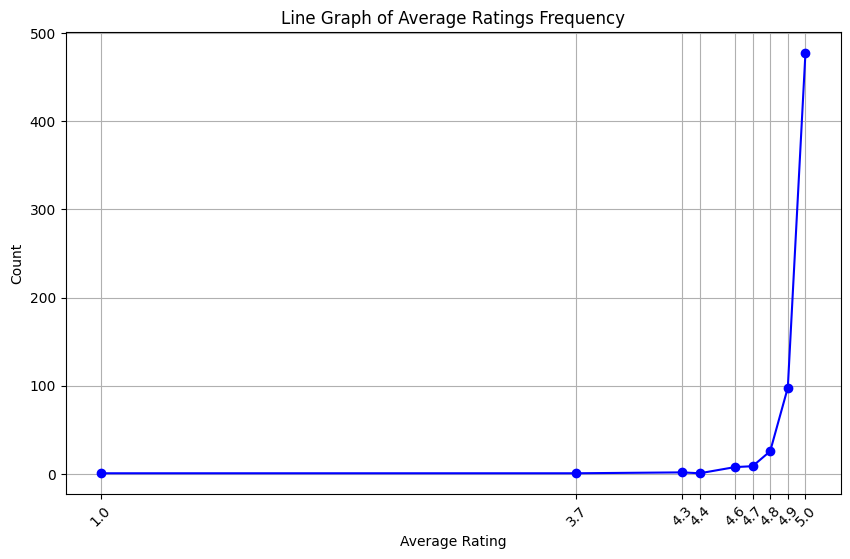

In [8]:
# plot a line graph to see the distribution of average rating, since categorical data is continuous not discrete
import matplotlib.pyplot as plt

# Get the value counts for 'Average Rating' (without NaN values)
avg_rating_counts = df['Average Rating'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
avg_rating_counts.plot(kind='line', marker='o', color='b')
plt.title('Line Graph of Average Ratings Frequency')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(avg_rating_counts.index, rotation=45)  # Set x-ticks to be the actual ratings values
plt.show()


The graph shows a sharp disparity. ~500 gigs were rated 5, with only 100 at 4.9, but it fillets to 4.3. Then 3.7 and 1.0 ratings are flat lines. I want to see a short list of the outliers with exceptionally low ratings.

In [9]:
# Filter the rows with ratings between 0 and 4.6
ratings_between_0_and_4_6 = df[(df['Average Rating'] >= 0) & (df['Average Rating'] < 4.7)]

# Get the counts of each unique rating within this range
ratings_count_table = ratings_between_0_and_4_6['Average Rating'].value_counts().sort_index().reset_index()

# Rename the columns for better clarity
ratings_count_table.columns = ['Rating', 'Count']

# Display the table
print(ratings_count_table)


   Rating  Count
0     1.0      1
1     3.7      1
2     4.3      2
3     4.4      1
4     4.6      8


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Further qualitative investigation is advised to identify the reasons for specific sellers receiving low ratings, but that is beyond the scope of this analysis.

**How should I fill the 630 NaN values?**

This pattern aligns with common marketplace dynamics, where sellers often receive near-perfect ratings due to rating inflation, selection bias, or customer hesitation to leave negative reviews. The abrupt cliffs and isolated low ratings are not data errors, but rather signal rare but genuine low-rated cases. These outliers are not to be corrected or smoothed, as they carry meaningful insights about edge cases in seller performance.

- Don’t fill with the mean or median blindly – those would almost certainly be close to 5.0 due to skew, which could introduce bias by inflating ratings.
- Don’t fill with zero or minimum – this would also create false negatives and drag down the profile of sellers unfairly.
- Don’t drop all NaNs automatically – if 630 of ~800+ are missing, you’d throw away too much data.

Over 600 entries are missing ratings (NaN), and the extreme skew of the existing ratings makes it inappropriate to fill these with generic imputation strategies such as the mean or median. Doing so would introduce a strong upward bias and artificially flatten the meaningful distribution observed. Instead, missing values are retained as-is for transparency, with optional segment-based analysis where appropriate.

In [10]:
df['Rating Missing'] = df['Average Rating'].isna().astype(int)
df['Estimated Min Revn'] = df['Number of Reviewers']*df['Price (USD)'] # estimated minimum revenue
df

,Title,Seller Level,Average Rating,Number of Reviewers,Price (USD),Seller Level Encoded,Rating Missing,Estimated Min Revn
0,"I will do excel formulas, vba macros, charts, ...",Level 2 Seller,5.0,56,41.433333,2,0,2320.266667
1,"I will do data mining, web scraping, data extr...",Top Rated Seller,5.0,1000,15.538095,3,0,15538.095238
2,"I will do web scraping , data scraping, scrapi...",Level 2 Seller,5.0,63,10.361905,2,0,652.800000
3,"I will do python web scraping , data entry , a...",Level 2 Seller,5.0,266,5.180952,2,0,1378.133333
4,I will data scraping web site scraping and dat...,Level 2 Seller,4.9,275,20.719048,2,0,5697.738095
...,...,...,...,...,...,...,...,...
1254,I will do any natural language processing or n...,NaN,4.9,22,10.361905,0,0,227.961905
1255,I will make your machine learning projects in ...,Level 1 Seller,4.9,56,31.076190,1,0,1740.266667
1256,I will do machine learning python projects,NaN,5.0,22,129.471429,0,0,2848.371429
1257,I will do machine learning projects in python,Level 2 Seller,4.9,38,88.042857,2,0,3345.628571


# Objective 1: Gig Categories

The approach will be using NLP to identify gig types based on keywords. I will use the keywords found from a wordcloud to guide me in identifying key phrases for each product category. This *qualitative content analysis* will build the initial taxonomy.

Note: Gig categories depend on product types and seller types, where each seller has a one-to-many relationship with product types.

### Word Cloud

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cleaned_df = df.copy()

allText = " ".join(cleaned_df.Title.values)
allCharacters = set(allText)
special_letters = []
num = []
CapitalAlpha = []
SmallAlpha = []
for letter in allCharacters:
    if ord('0') <= ord(letter) and ord(letter) <= ord('9'):
        num.append(letter)
    elif ord('a') <= ord(letter) and ord(letter) <= ord('z'):
        SmallAlpha.append(letter)
    elif ord('A') <= ord(letter) and ord(letter) <= ord('Z'):
        CapitalAlpha.append(letter)
    else:
        special_letters.append(letter)
CapText = sorted(CapitalAlpha) if len(CapitalAlpha) != 26 else "A-Z"
SmallText = sorted(SmallAlpha) if len(SmallAlpha) != 26 else "a-z"
print(f"Numerical Letters : {sorted(num)}")
print(f"Capital Letters : {CapText}")
print(f"Small Letters : {SmallText}")
print(f"Non-Alpha Numeric Characters : {special_letters}")

Numerical Letters : ['0', '1', '2', '3', '4', '5', '6', '7', '9']
Capital Letters : ['A', 'C', 'D', 'F', 'H', 'I', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'W', 'X']
Small Letters : a-z
Non-Alpha Numeric Characters : [' ', ',']


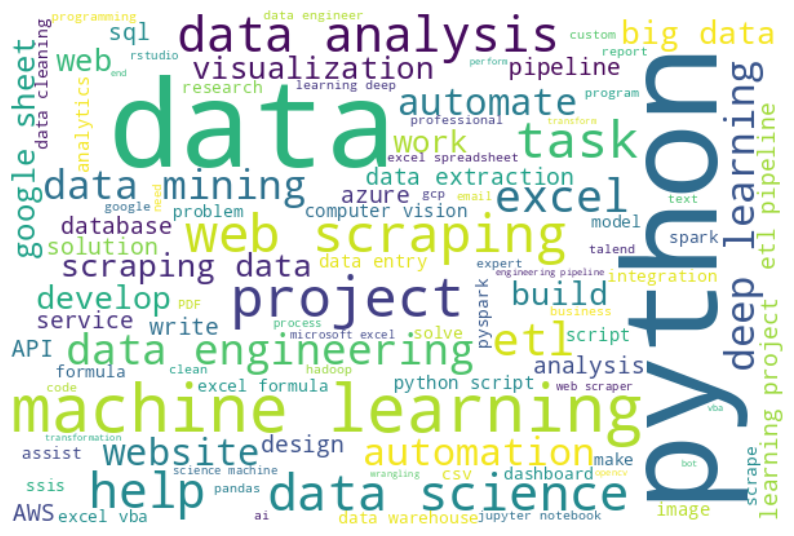

In [12]:
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["will","using","provide","related","create", "I", "do"])
processed_text = allText.replace(',', ' ')
wordcloud = WordCloud(stopwords= stopwords, max_font_size=100, width=600, height=400, max_words=100, background_color="white").generate(text=processed_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from collections import Counter
import re

# Reuse the same cleaned text used for the wordcloud
# Lowercase and split the text into words
words = re.findall(r'\b\w+\b', processed_text.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count word frequencies
word_freq = Counter(filtered_words)

# Convert to DataFrame
import pandas as pd
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Show top 20 keywords
word_freq_df.head(20)


,Word,Count
7,data,760
16,python,302
316,learning,206
284,machine,158
0,excel,143
9,web,142
10,scraping,125
208,etl,116
243,analysis,112
87,projects,100


By ranking high-frequency keywords extracted from gig titles—such as Python, data, machine learning, Excel, web scraping, and ETL—I start to observe meaningful patterns that go beyond generic buzzwords. Terms like SQL, VBA, and automation appear less frequently but are still identifiable and relevant.

This keyword prominence gives valuable signals: certain tools and concepts (e.g., machine learning, Excel, web scraping) consistently represent specific job types on Fiverr. Therefore, rather than forcing a rigid, one-gig-one-category taxonomy, I am framing this analysis around seller archetypes, inferred from the types of jobs they advertise.

### Rule-based Keyword Classification

In [14]:
gig_keywords = {
    # Excel jobs
    # if the tweet has "excel", it's mostly an excel guy
    # the more special ones know vba
    'Excel Specialist': [
        'excel formula',
        'excel CSV',
        'vba macros',
        'vba',
        'macros',
        'automate excel',
        'chart',
        'spreadsheet',
        'google sheets',
        'custom excel spreadsheet'
    ],
    
    # scraping and mining are usually bundled in the same gig worker
    # they're data gatherers, not analysis of the buyer's data
    'Data Gatherer': [
        'data mining',
        'web scraping',
        'web scraper',
        'web scrapers',
        'data extraction',
        'data entry',
        'crawling',
        'data collection',
        'product scraping',
        'image scraping',
        'aggregate data',
        'beautifulsoup', 
        'selenium',
        'scrapy'
    ],
    
    # many automation jobs specify python, others don't, and some specify other tools
    'Automators': [
        'scripts automation',
        'automate',
        'google apps script',
    ],
    
    # special services
    'Special Services': [
    'api',
    'apis',
    'tradingview pinescript',
    'machine learning',
    'etl pipeline',
    'data engineering pipeline',
    'big data',
    ]
}

**Manual Inspection & Initial Archetype Discovery**

Through manual inspection of the first 60 gig titles, I have identified preliminary **seller archetypes** based on recurring keywords, tool names, and implied service types. These archetypes suggest that sellers typically fall into one of the following broad categories:

* **Excel Specialists** – focusing on formulas, spreadsheets, and VBA macros
* **Data Gatherers** – offering services such as web scraping and data mining
* **Automators** – providing workflow automation using Python or Google Apps Script
* **Technical Specialists** – including more advanced offerings like APIs, machine learning, ETL pipelines, or big data solutions

**Steps for Categorization**

To refine this categorization approach:

1. **Quantify coverage**: Estimate what percentage of sellers fall into these identified archetypes.
2. **Handle edge cases**: For gigs that don’t clearly fit into the initial groups, analyze their content further to determine whether they represent additional categories or are simply misclassified.
3. **Validate assignments**: Ensure that each gig is appropriately assigned by checking for misinterpretations or keyword collisions (e.g., a mention of "Python" in a context unrelated to data services).
4. **Iterate and expand**: Use semi-automated methods (e.g., clustering or keyword co-occurrence analysis) to further subdivide or refine the initial archetypes into more granular, market-relevant categories.

This phased strategy balances domain knowledge with scalable methods to build a more accurate and meaningful taxonomy of Fiverr’s data analytics service landscape.


In [15]:
import re

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords
    filtered = [word for word in words if word not in stopwords]
    return ' '.join(filtered)

df['clean_title'] = df['Title'].apply(preprocess)
df


,Title,Seller Level,Average Rating,Number of Reviewers,Price (USD),Seller Level Encoded,Rating Missing,Estimated Min Revn,clean_title
0,"I will do excel formulas, vba macros, charts, ...",Level 2 Seller,5.0,56,41.433333,2,0,2320.266667,excel formulas vba macros charts forms addins
1,"I will do data mining, web scraping, data extr...",Top Rated Seller,5.0,1000,15.538095,3,0,15538.095238,data mining web scraping data extractionexcel ...
2,"I will do web scraping , data scraping, scrapi...",Level 2 Seller,5.0,63,10.361905,2,0,652.800000,web scraping data scraping scraping emails web...
3,"I will do python web scraping , data entry , a...",Level 2 Seller,5.0,266,5.180952,2,0,1378.133333,python web scraping data entry data extraction
4,I will data scraping web site scraping and dat...,Level 2 Seller,4.9,275,20.719048,2,0,5697.738095,data scraping web site scraping data collection
...,...,...,...,...,...,...,...,...,...
1254,I will do any natural language processing or n...,NaN,4.9,22,10.361905,0,0,227.961905,natural language processing nlp projects python
1255,I will make your machine learning projects in ...,Level 1 Seller,4.9,56,31.076190,1,0,1740.266667,make machine learning projects python
1256,I will do machine learning python projects,NaN,5.0,22,129.471429,0,0,2848.371429,machine learning python projects
1257,I will do machine learning projects in python,Level 2 Seller,4.9,38,88.042857,2,0,3345.628571,machine learning projects python


In [16]:
def assign_category(title):
    # TODO this function is not good enough. Use the rules I wrote.
    # 1. if the tweet has "excel", assume it's an excel guy
    # 2. special excel guy knows vba
    for category, keywords in gig_keywords.items():
        if any(kw in title for kw in keywords):
            return category
    return 'Other'

df['Archetype'] = df['clean_title'].apply(assign_category)

archetype_counts = df['Archetype'].value_counts(normalize=True) * 100
print(archetype_counts.round(2).astype(str) + '%')


Archetype
Other               57.67%
Special Services    20.37%
Data Gatherer       12.22%
Excel Specialist     7.75%
Automators            2.0%
Name: proportion, dtype: object


The initial keywords cover 43% of the main archetypes, ignoring defects.

### ⚠️ Note on Categorization Scope
A dedicated project would be advisable for the specific purpose of refining the `gig_keywords` dictionary and improving the `assign_category()` function. That work would involve more robust NLP techniques (e.g., multi-label classification, embedding-based similarity, or topic modeling) to better handle ambiguous or multi-service gig titles.

However, for the purposes of this notebook, I will not iterate further on that component. I will proceed using the current set of seller archetypes — Excel Specialists, Data Gatherers, and Special Services — to demonstrate how one might analyze and compare seller pricing strategies across job types.

This simplification allows me to complete the workflow and pricing analysis, with the understanding that any improvements in categorization will seamlessly enhance the downstream pricing insights.

# Objective 2: Analyze Pricing by Seller Type


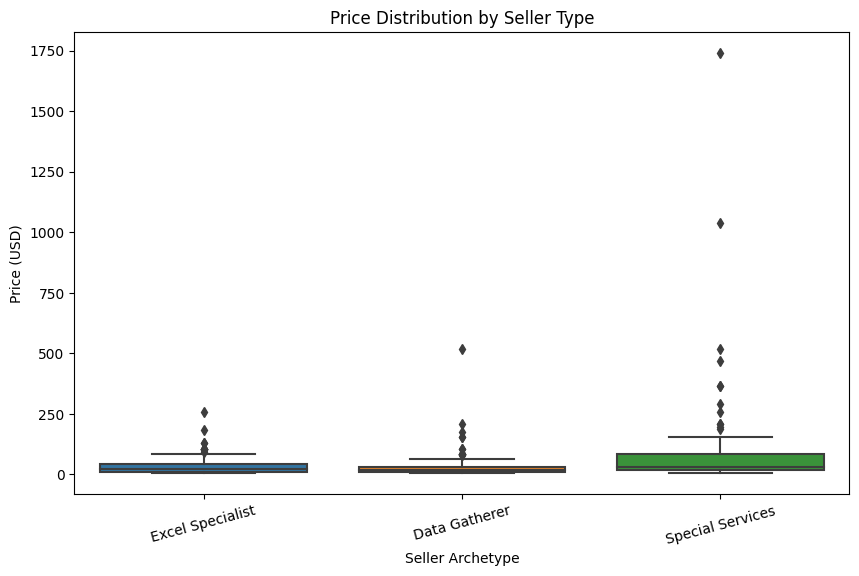

In [17]:
recognized_types = ['Excel Specialist', 'Data Gatherer', 'Special Services']
df_filtered = df[df['Archetype'].isin(recognized_types)].copy()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Archetype', y='Price (USD)')
plt.title('Price Distribution by Seller Type')
plt.ylabel('Price (USD)')
plt.xlabel('Seller Archetype')
plt.xticks(rotation=15)
plt.show()


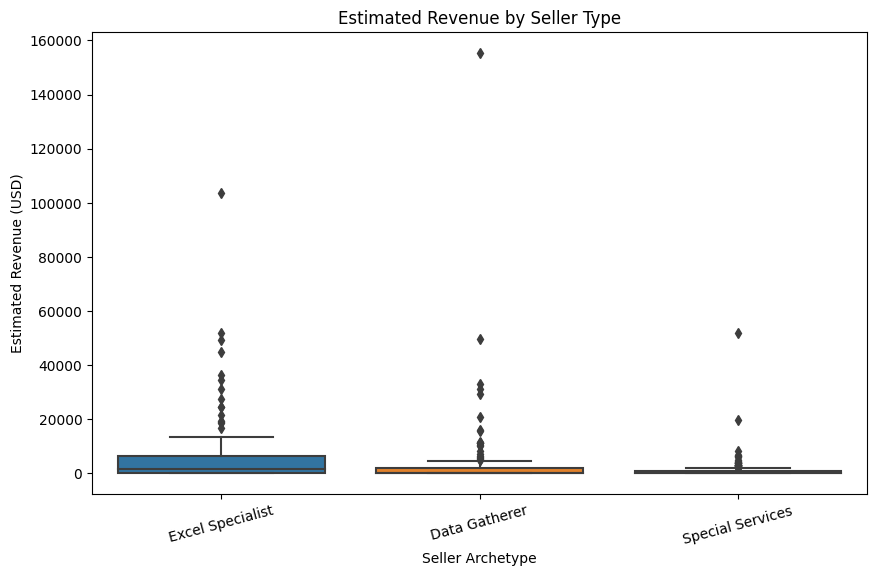

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Archetype', y='Estimated Min Revn')
plt.title('Estimated Revenue by Seller Type')
plt.ylabel('Estimated Revenue (USD)')
plt.xlabel('Seller Archetype')
plt.xticks(rotation=15)
plt.show()


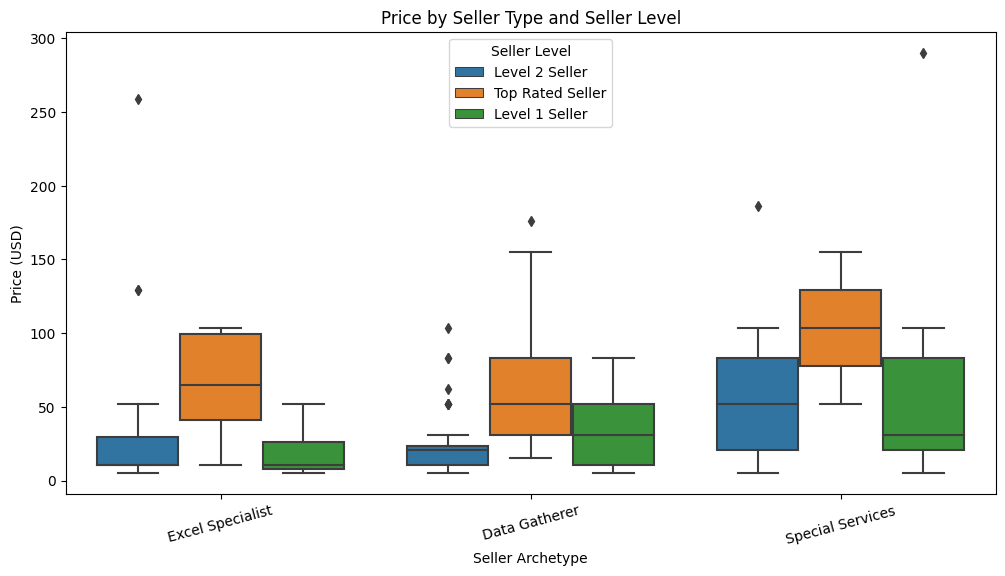

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Archetype', y='Price (USD)', hue='Seller Level')
plt.title('Price by Seller Type and Seller Level')
plt.ylabel('Price (USD)')
plt.xlabel('Seller Archetype')
plt.xticks(rotation=15)
plt.legend(title='Seller Level')
plt.show()


but these don't show numbers...I need tables of numbers to think about

In [20]:
df_filtered['Archetype'].value_counts()
df_filtered.groupby('Archetype')['Price (USD)'].mean().round(2)
df_filtered.groupby('Archetype')['Price (USD)'].median()
df_filtered.groupby('Archetype')['Estimated Min Revn'].mean().round(2)
pd.crosstab(df_filtered['Archetype'], df_filtered['Seller Level'])
summary = df_filtered.groupby('Archetype').agg(
    count=('Price (USD)', 'count'),
    avg_price=('Price (USD)', 'mean'),
    median_price=('Price (USD)', 'median'),
    avg_revenue=('Estimated Min Revn', 'mean')
).round(2)

summary


,count,avg_price,median_price,avg_revenue
Archetype,,,,
Data Gatherer,153,30.97,15.54,3517.93
Excel Specialist,97,35.08,20.72,7236.99
Special Services,255,63.45,31.08,955.03


# Conclusions

**1. Special Services charge the most but earn the least**

* **Highest average price**: \$63.45
* **Lowest average revenue**: \$955.03
  **Interpretation**: These gigs charge more per job but probably get fewer orders. This could reflect niche, complex services like ML or APIs with lower demand or higher entry barriers.

**2. Excel Specialists earn the most overall**

* **Average price**: \$35.08
* **Highest average revenue**: **\$7236.99**
  **Interpretation**: Despite moderate pricing, Excel gigs get *many* orders. It’s a strong, practical niche with wide demand—likely due to business use cases and accessibility.

**3. Data Gatherers are low-price, moderate-revenue**

* **Lowest median price**: \$15.54
* **Average revenue**: \$3517.93
  **Interpretation**: This is likely a “commodity” gig type—high competition, lower pricing, moderate volume. Might be entry-level or heavily outsourced.

There seems to be a **trade-off between price and demand**:
* *Specialists* charge premium rates but attract fewer clients.
* *Excel sellers* find the best revenue through accessible, recurring demand.
* *Data Gatherers* are likely generalists with average results, showing the middle ground.

## Further notes:
- For beginners aiming to break into the platform, it’s advisable to filter the analysis to Level 1 Sellers, as this represents a realistic short-term milestone and excludes both complete newcomers and elite outliers.
- It’s also worth identifying what separates unsuccessful sellers without any level from those on a path toward success — helping new entrants avoid poor role models.
- Finally, comparing the three dominant archetypes (Excel Specialists, Data Gatherers, Special Services) with other niche specialists could reveal which directions yield the most success, and why — offering insight into which skills are most commercially viable.

## Personal Notes

Personally, I was surprised by the results — I expected Data Gatherers to be the most lucrative group, but Excel Specialists outperformed them in average revenue, despite having fewer gigs.

That said, this is based on an early iteration of the categorization logic, and refinements to the `gig_keywords` and `assign_category()` function may change these insights. Still, this analysis is useful for illustrating the approach and forming initial hypotheses.